In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
#OrdinalEncoder could be used

# Assuming data is in a csv file
data = pd.read_csv("new_torch_balenced_data.csv")
api_list=pd.read_csv("FreeFuzz_torch_API_list.csv")
#api_list=pd.read_csv("FreeFuzz_torch_API_list.csv")
# Convert API names and parameters to string if not already
data["API Name"] = data["API Name"].astype(str)
data["Parameters"] = data["Parameters"].astype(str)
api_list["API Name"]=api_list["API Name"].astype(str)
#api_list["API Name"]=api_list["API Name"].astype(str)
# Initialize TF-IDF vectorizer and Label Encoder
tfidf = TfidfVectorizer(max_features=1000)
le = LabelEncoder()
# Define the MinMaxScaler
scaler = MinMaxScaler()

# Encode API names
#api_names_encoded = le.fit_transform(data["API Name"])
dictionary = le.fit_transform(api_list["API Name"])
api_names_encoded=le.transform(data["API Name"])

# Reshape the encoded API names to 2D array
api_names_encoded = api_names_encoded.reshape(-1, 1)

# Fit and transform the encoded API names with MinMaxScaler
api_names_normalized = scaler.fit_transform(api_names_encoded)


# Convert them back to 1D
#api_names_normalized = api_names_normalized.flatten()

# Convert parameters into TF-IDF vectors
parameters_tfidf = tfidf.fit_transform(data["Parameters"])

# Combine the encoded API names and TF-IDF parameter vectors
X = np.concatenate((api_names_normalized, parameters_tfidf.toarray()), axis=1)

# Convert labels into binary format
y = data["Label"].map({'bug': 1, 'success': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [36]:
print(api_names_encoded_normed)

MinMaxScaler()


In [2]:
from tensorflow.keras import backend as K

# F1 Score
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

2023-07-10 12:33:28.321033: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-10 12:33:28.665635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 12:33:29.409814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [42]:
print(*X_train[0])

0.8347639484978541 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.7483270487092359 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

In [29]:
print(*y_train)

1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 

In [5]:
print(y_train_smote)

0       1
1       0
2       0
3       1
4       0
       ..
1037    0
1038    0
1039    1
1040    1
1041    0
Name: Label, Length: 1042, dtype: int64


In [3]:
import tensorflow as tf

# Model Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_smote.shape[1]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), f1_score])

# Train the Model
history = model.fit(
    X_train_smote, y_train_smote, 
    epochs=30, 
    batch_size=32, 
    validation_data=(X_test, y_test))

2023-07-10 12:33:33.682182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-10 12:33:34.079684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-10 12:33:34.079795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/30


2023-07-10 12:33:36.951189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-10 12:33:37.000952: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fcc9c015690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-10 12:33:37.000963: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-07-10 12:33:37.045692: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-10 12:33:38.742553: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-07-10 12:33:39.017837: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

33/33 [==============================] - 4s 5ms/step - loss: 0.6806 - precision: 0.5675 - recall: 0.7908 - f1_score: 0.6542 - val_loss: 0.6637 - val_precision: 0.6200 - val_recall: 0.9538 - val_f1_score: 0.7380
Epoch 2/30
33/33 [==============================] - 0s 2ms/step - loss: 0.6415 - precision: 0.6714 - recall: 0.8234 - f1_score: 0.7338 - val_loss: 0.6102 - val_precision: 0.7303 - val_recall: 0.8538 - val_f1_score: 0.7448
Epoch 3/30
33/33 [==============================] - 0s 2ms/step - loss: 0.5664 - precision: 0.7483 - recall: 0.8215 - f1_score: 0.7800 - val_loss: 0.5178 - val_precision: 0.7635 - val_recall: 0.8692 - val_f1_score: 0.7749
Epoch 4/30
33/33 [==============================] - 0s 2ms/step - loss: 0.4869 - precision: 0.7672 - recall: 0.8541 - f1_score: 0.8070 - val_loss: 0.4762 - val_precision: 0.7956 - val_recall: 0.8385 - val_f1_score: 0.7786
Epoch 5/30
33/33 [==============================] - 0s 2ms/step - loss: 0.4389 - precision: 0.7996 - recall: 0.8349 - f1_sc

In [4]:
history.history.keys()

dict_keys(['loss', 'precision', 'recall', 'f1_score', 'val_loss', 'val_precision', 'val_recall', 'val_f1_score'])

In [6]:
import matplotlib.pyplot as plt

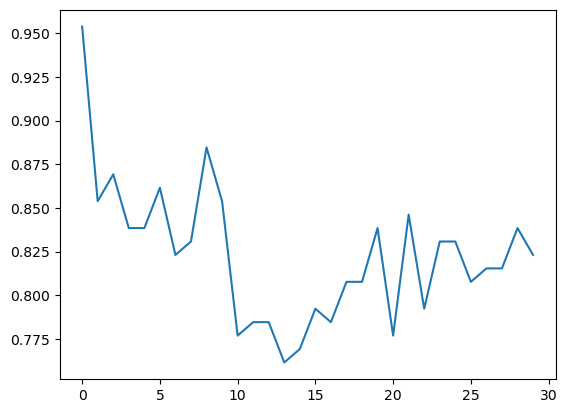

In [7]:
plt.plot(history.epoch,history.history.get('val_recall'))

In [8]:
# Read new data from a csv file
new_data = pd.read_csv("torch_seed_data.csv")

# Ensure API names and parameters are strings
new_data["API Name"] = new_data["API Name"].astype(str)
new_data["Parameters"] = new_data["Parameters"].astype(str)

# Perform the same preprocessing steps as before
new_data_tfidf = tfidf.transform(new_data["Parameters"]).toarray()
new_api_names_encoded = le.transform(new_data["API Name"])

# Reshape the encoded API names to 2D array
new_api_names_encoded = new_api_names_encoded.reshape(-1, 1)

# Fit and transform the encoded API names with MinMaxScaler
api_names_normalized = scaler.transform(new_api_names_encoded)


X_new = np.concatenate((api_names_normalized, new_data_tfidf), axis=1)

# Predict the labels
predictions = model.predict(X_new)
new_data["Potential"]=predictions
# Convert the probabilities to class labels
#predictions_labels = (predictions > 0.5).astype(int)

# Add the predictions to the new_data DataFrame
#new_data["Label_model"] = ["success" if element == 0 else "bug" for element in predictions_labels]

# Write the DataFrame with the predictions to a new csv file
new_data.to_csv("torch_seed_data_predicted.csv", index=False)


389/389 [==============================] - 0s 399us/step
